In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [4]:
pdf = pd.read_csv("Iris.csv")
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = pdf[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  900
Shape of dataset after cleaning:  900


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
featureset = pdf[['SepalLengthCm',  'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [8]:
from sklearn.preprocessing import StandardScaler
x = featureset.values #returns a numpy array
standard_scaler = StandardScaler()
feature_mtx = standard_scaler.fit_transform(x)
feature_mtx [0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [15]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.18212094 0.84856711 ... 3.80606726 3.82448796 3.33620324]
 [1.18212094 0.         0.52549943 ... 3.74544575 4.01679443 3.21249253]
 [0.84856711 0.52549943 0.         ... 3.93572117 4.07138458 3.37976603]
 ...
 [3.80606726 3.74544575 3.93572117 ... 0.         1.07582215 0.77518629]
 [3.82448796 4.01679443 4.07138458 ... 1.07582215 0.         1.20421099]
 [3.33620324 3.21249253 3.37976603 ... 0.77518629 1.20421099 0.        ]]


In [16]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [17]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [18]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


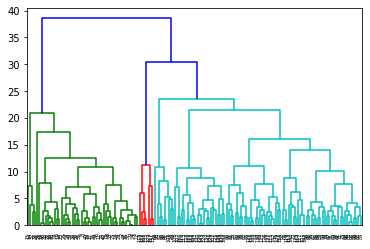

In [19]:
dendro = hierarchy.dendrogram(Z)